In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 

In [2]:
%matplotlib inline

In [3]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data['bmi'].head(10)

0    36.6
1     NaN
2    32.5
3    34.4
4    24.0
5    29.0
6    27.4
7    22.8
8     NaN
9    24.2
Name: bmi, dtype: float64

In [7]:
data['bmi'].isna()

0       False
1        True
2       False
3       False
4       False
        ...  
5105     True
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5110, dtype: bool

In [8]:
data['bmi'].dtype

dtype('float64')

In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
data['bmi']

0       36.6
2       32.5
3       34.4
4       24.0
5       29.0
        ... 
5104    18.6
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 4909, dtype: float64

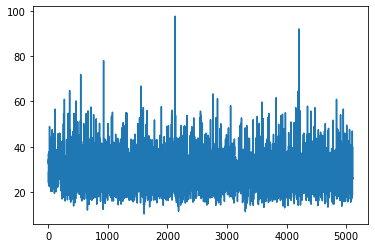

In [12]:
data['bmi'].plot();

In [13]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [14]:
data.shape

(4909, 12)

In [15]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

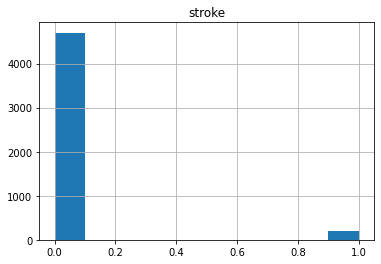

In [16]:
data.hist('stroke');

In [17]:
gender=pd.get_dummies(data['gender'],drop_first=True)

In [18]:
gender

,Male,Other
0,1,0
2,1,0
3,0,0
4,0,0
5,1,0
...,...,...
5104,0,0
5106,0,0
5107,0,0
5108,1,0


In [19]:
married=pd.get_dummies(data['ever_married'],drop_first=True)

In [20]:
workPlace=pd.get_dummies(data['work_type'],drop_first=True)

In [21]:
Residence=pd.get_dummies(data['Residence_type'],drop_first=True)

In [22]:
smoking=pd.get_dummies(data['smoking_status'],drop_first=True)

In [23]:
data=data.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)

In [24]:
data=data.drop('id',axis=1)

In [25]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [26]:
data=pd.concat([data,gender,married,workPlace,Residence,smoking],axis=1)

In [27]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Other,Yes,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,0,0,0,0,1,0,0,0,0
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0


In [28]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Other,Yes,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575,0.409656,0.000204,0.652679,0.004482,0.572622,0.157873,0.136688,0.507232,0.170503,0.377266,0.150132
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917,0.491820,0.014273,0.476167,0.066801,0.494748,0.364659,0.343552,0.499999,0.376113,0.484752,0.357238
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
y=data['stroke']
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

In [31]:
X=data.drop('stroke',axis=1)

In [32]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,Other,Yes,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,0,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,0,0,0,1,0,0,0,0
5106,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,1,0,1,0,1,0,0,0,1,0,0


In [38]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [39]:
X_train.shape

(3927, 16)

In [40]:
X_test.shape

(982, 16)

In [41]:
y_train.shape,y_test.shape

((3927,), (982,))